# Introduction
Exploratory Data Analysis is a set of techniques that were developed by Tukey, John Wilder in 1970. The philosophy behind this approach was to examine the data before building a model. John Tukey encouraged statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. Today Data scientists and analysts spend most of their time in Data Wrangling and Exploratory Data Analysis also known as EDA. But what is this EDA and why it is so important? This article explains what is EDA and how to apply EDA techniques to a dataset.

# Table of Contents

1. What is Exploratory Data Analysis?

2. Why EDA is important?

3. How to perform EDA?

4. Endnote

# What is Exploratory Data Analysis?

Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. Following things are part of EDA :

 - Get maximum insights from a data set
 - Uncover underlying structure
 - Extract important variables from the dataset
 - Detect outliers and anomalies(if any)
 - Test underlying assumptions
 - Determine the optimal factor settings


# Why EDA is important?

The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. It allows Analysts to understand the data better before making any assumptions. The outcomes of EDA helps businesses to know their customers, expand their business and take decisions accordingly.

### For performing EDA, I'll be using (Automobile Dataset) https://www.kaggle.com/toramky/automobile-dataset 

# 1. Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/home/shawaiz/Desktop/Data_sets/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### We can see that the dataset has 26 attributes and column names are missing. We can also observe that there are ‘?’ at some places which means our data has missing value also. We will fill in column names first.

In [3]:
cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels_engine','location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df.columns = cols
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


We got our column names. Here the "price" column is our target variable.

# 2.Check for missing values

In [4]:
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
num_of_doors           0
body_style             0
drive_wheels_engine    0
location               0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
num_of_cylinders       0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

#### It is showing that we don’t have any null values in our dataset but we have observed earlier that there were ‘?’ symbols in the dataset, which means that these symbols are in the form of an object.  Let us now check the data types of each attribute.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   normalized_losses    205 non-null    object 
 2   make                 205 non-null    object 
 3   fuel_type            205 non-null    object 
 4   aspiration           205 non-null    object 
 5   num_of_doors         205 non-null    object 
 6   body_style           205 non-null    object 
 7   drive_wheels_engine  205 non-null    object 
 8   location             205 non-null    object 
 9   wheel_base           205 non-null    float64
 10  length               205 non-null    float64
 11  width                205 non-null    float64
 12  height               205 non-null    float64
 13  curb_weight          205 non-null    int64  
 14  engine_type          205 non-null    object 
 15  num_of_cylinders     205 non-null    obj

#### We can observe that those columns that have symbols are in object form as well as some columns should be of an integer type but are of an object type. Now let us detect which columns have symbols and if there are any other symbols too.

In [6]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized_losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num_of_doors : ['two' 'four' '?']
body_style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels_engine : ['rwd' 'fwd' '4wd']
location : ['front' 'rear']
wheel_base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

#### There are null values in our dataset in form of ‘?’ only but pandas are not reading them so we will replace them into np.nan form.

In [7]:
for col in df.columns:
    df[col].replace({'?':np.nan},inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Now we can observe that the ‘?’ symbols have been converted into NaN form. Let us check for missing values again.

In [8]:
df.isnull().sum()

symboling               0
normalized_losses      41
make                    0
fuel_type               0
aspiration              0
num_of_doors            2
body_style              0
drive_wheels_engine     0
location                0
wheel_base              0
length                  0
width                   0
height                  0
curb_weight             0
engine_type             0
num_of_cylinders        0
engine_size             0
fuel_system             0
bore                    4
stroke                  4
compression_ratio       0
horsepower              2
peak_rpm                2
city_mpg                0
highway_mpg             0
price                   4
dtype: int64

#### We can observe that now there are missing values in some columns.

# 3. Visualizing the missing values

With the help of heatmap, we can see the amount of data that is missing from the attribute. With this, we can make decisions whether to drop these missing values or to replace them. Usually dropping the missing values is not advisable but sometimes it may be helpful too.

<AxesSubplot:>

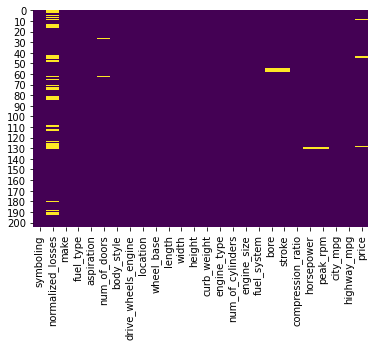

In [9]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

#### Now observe that there are many missing values in normalized_losses while other columns have fewer missing values. We can’t drop the normalized_losses column as it may be important for our prediction.

# 4.Replacing the missing values

We will be replacing these missing values with mean because the number of missing values is less(we can use median too).

In [10]:
num_col = ['normalized_losses', 'bore',  'stroke', 'horsepower', 'peak_rpm','price']
for col in num_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### We can observe that now our missing values are replaced with mean.

# 5. Asking Analytical Questions and Visualizations

This is the most important step in EDA. This step will decide how much can you think as an Analyst. This step varies from person to person in terms of their questioning ability. Try to ask questions related to independent variables and the target variable. For example – how fuel_type will affect the price of the car?

Before this let us check the correlation between different variables, this will give us a roadmap on how to proceed further.

<AxesSubplot:>

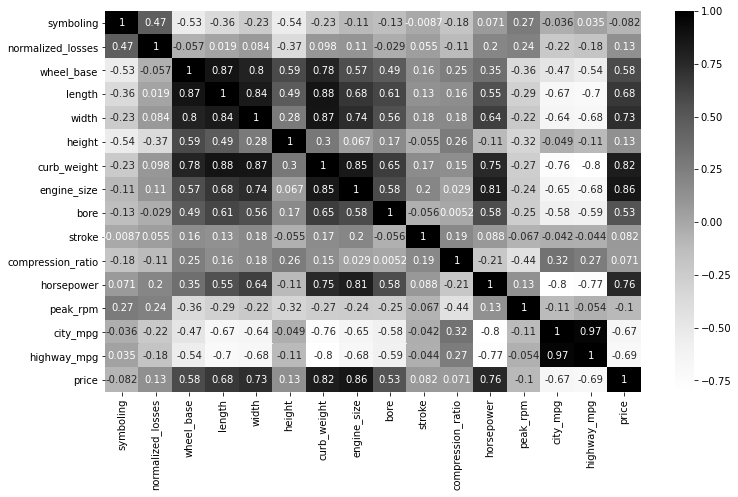

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greys')

### Positive Correlation

   - Price – wheel_base, length, width, curb_weight, engine_size, bore, horsepower
   - wheelbase – length, width, height, curb_weight, engine_size, price
   - horsepower – length, width, curb_weight, engine_size, bore, price
   - Highway mpg – city mpg

### Negative Correlation

   - Price – highway_mpg, city_mpg
   - highway_mpg – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price
   - city – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price

#### This heatmap has given us great insights into the data.

#### Now let us apply domain knowledge and ask the questions which will affect the price of the automobile.

# 1. How does the horsepower affect the price?

Text(0, 0.5, 'Price')

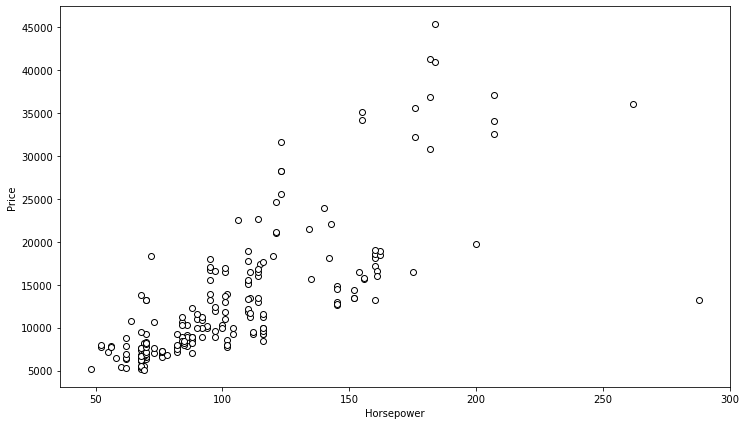

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(x='horsepower',y='price',data=df,color='w',edgecolor='k',linewidths=1)
plt.xlabel('Horsepower')
plt.ylabel('Price')

#### We can see that most of the horsepower value lies between 50-150 has price mostly between 5000-25000, there are outliers also(between 200-300).

#### Let’s see a count between 50-100 i.e univariate analysis of horsepower.



<AxesSubplot:xlabel='horsepower', ylabel='Count'>

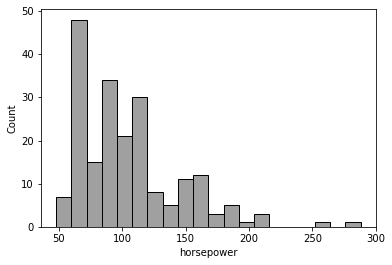

In [13]:
sns.histplot(df.horsepower,bins=20,color='grey')

#### The average count between 50-100 is 50 and it is positively skewed.

# 2. What is the relation between engine_size and price?

In [14]:
#plt.figure(figsize=(10,7))
#plt.scatter(x='engine_size',y='price',data=df,color='k')
#plt.xlabel('Engine size')
#plt.ylabel('Price')

#### We can observe that the pattern is similar to horsepower vs price.

# 3. How does highway_mpg affects price?

Text(0, 0.5, 'Price')

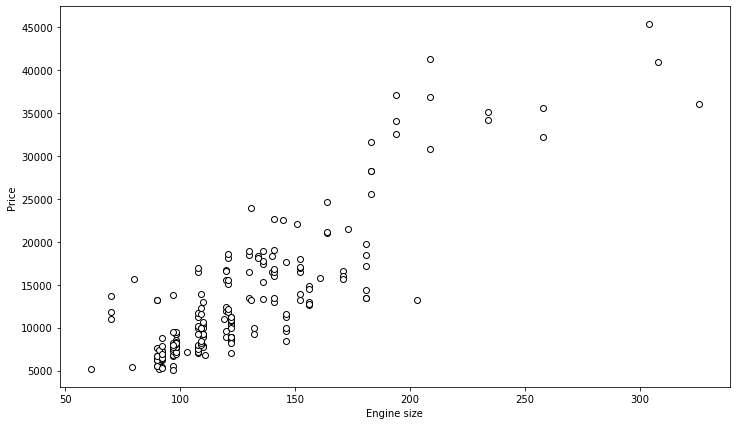

In [15]:
plt.figure(figsize=(12,7))
plt.scatter(x='engine_size',y='price',data=df,color='w',edgecolors='k',linewidths=1)
plt.xlabel('Engine size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

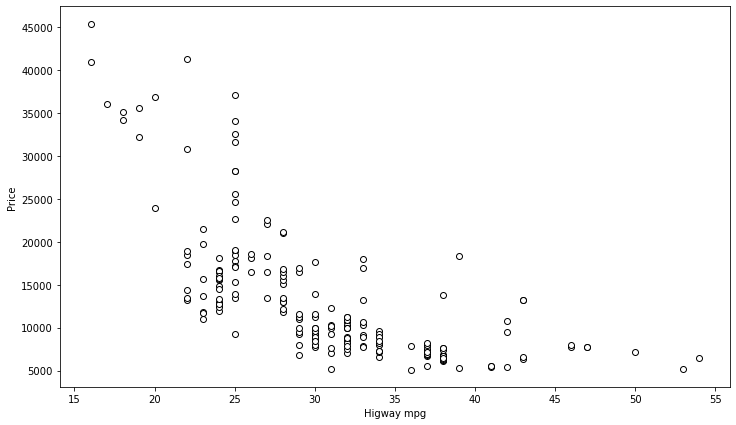

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(x='highway_mpg',y='price',data=df,color='w',edgecolors='k',linewidths=1)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

#### We can see price decreases with an increase in higway_mpg.

#### Let us check the number of doors.

In [17]:
#Unique values in num_of_doors
df.num_of_doors.value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

# 4. Relation between no. of doors and price

We will use a boxplot for this analysis.

<AxesSubplot:xlabel='price', ylabel='num_of_doors'>

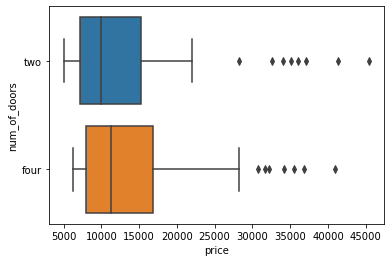

In [18]:
sns.boxplot(x='price',y='num_of_doors',data=df)

#### With this boxplot, we can conclude that the average price of a vehicle with two doors is 10000,  and the average price of a vehicle with four doors is 12000.

#### With this plot, we have gained enough insights from data and our data is ready to build a model.